# Fine-tuning pretrained models in PyTorch

The `12_fine_tuning_pretrained_models` notebook focuses on fine-tuning pretrained models to improve performance on new tasks. Fine-tuning involves both freezing certain layers for feature extraction and unfreezing others to allow adaptation to the new task. 

This notebook covers dataset preparation, loading a pretrained model, freezing layers for feature extraction, unfreezing layers for fine-tuning, and training the model. Additionally, it explores evaluating model performance and experimenting with hyperparameters to optimize the fine-tuning process.

## Table of contents

1. [Understanding fine-tuning in transfer learning](#understanding-fine-tuning-in-transfer-learning)
2. [Setting up the environment](#setting-up-the-environment)
3. [Preparing the dataset](#preparing-the-dataset)
4. [Loading a pretrained model](#loading-a-pretrained-model)
5. [Freezing layers for feature extraction](#freezing-layers-for-feature-extraction)
6. [Unfreezing layers for fine-tuning](#unfreezing-layers-for-fine-tuning)
7. [Training the model](#training-the-model)
8. [Evaluating model performance](#evaluating-model-performance)
9. [Experimenting with hyperparameters](#experimenting-with-hyperparameters)

## Understanding fine-tuning in transfer learning

Fine-tuning is a transfer learning technique where a pretrained model, trained on a large dataset for one task, is adapted to a new, related task by allowing part of the model to be retrained (or fine-tuned) on the new dataset. The goal is to leverage the knowledge the model has already gained from the large dataset and adjust it to better suit the specific characteristics of the new task.

### **Why fine-tuning?**

Fine-tuning is particularly useful when:
- **You have limited data**: Instead of training a model from scratch, which would require a large dataset to avoid overfitting, fine-tuning allows you to adapt a model that has already learned important features from a large dataset (e.g., ImageNet).
- **The new task is related to the original task**: When the new task is somewhat similar to the task the model was originally trained on, fine-tuning the model helps adjust it to specific nuances of the new task while retaining the general knowledge it has already learned.
- **Performance improvements**: Fine-tuning can help squeeze better performance out of pretrained models by adapting them more closely to the new data.

### **Key concepts in fine-tuning**

#### **Pretrained models**

Fine-tuning always starts with a pretrained model. Pretrained models, such as ResNet, VGG, and others, are typically trained on large datasets like ImageNet. These models learn to extract general features from the data—like edges, textures, and shapes in the case of image datasets—that can be useful across a wide variety of tasks.

The layers of a pretrained model are typically divided into two types:
- **Early layers**: These layers learn low-level, general features (e.g., edges, gradients). These features are often useful across different tasks and tend to be more stable.
- **Later layers**: These layers learn higher-level, more task-specific features (e.g., object parts, specific categories) and may need more adaptation for new tasks.

#### **Feature extraction vs fine-tuning**

In **feature extraction**, the pretrained model's weights remain fixed (frozen), and only the final classifier layer is replaced and trained for the new task. This approach works well when the new dataset is small or when the new task is closely related to the original task.

In **fine-tuning**, the final classification layer is replaced, but some or all of the layers in the pretrained model are also unfrozen and retrained on the new dataset. This approach allows the model to adjust its previously learned features to better suit the specific task at hand.

Fine-tuning is generally more effective when:
- The new task is different from the original task.
- The new dataset is large enough to support retraining without overfitting.
- There is a need to adapt the model’s features to the specifics of the new dataset.

### **How fine-tuning works**

Fine-tuning involves selectively retraining layers of the pretrained model. Here’s a typical process:

1. **Replace the final layer**: The final classification layer of the pretrained model is removed and replaced with a new layer specific to the new task. For instance, if the original model was trained on ImageNet (which has 1,000 classes) but the new task has only 10 classes, the final layer is replaced with a new one that matches the number of classes in the new dataset.
2. **Freeze earlier layers**: Often, the early layers of the pretrained model are kept frozen. These layers contain low-level features that are general enough to be useful across many tasks. Freezing these layers helps preserve the features they have learned and reduces the risk of overfitting.
3. **Unfreeze later layers**: The later layers of the model are usually task-specific and are unfrozen so that they can be retrained on the new dataset. Fine-tuning these layers allows the model to adjust to the new task by learning task-specific features from the new data.
4. **Train with a lower learning rate**: Fine-tuning is typically done with a much lower learning rate than training from scratch. This is because the pretrained model’s weights already contain valuable information, and large updates to these weights could cause the model to forget what it has already learned (a phenomenon known as **catastrophic forgetting**). A lower learning rate helps make smaller adjustments to the weights, allowing the model to fine-tune its features without losing the general knowledge it has gained.

### **How fine-tuning affects the model**

#### **Gradient flow in fine-tuning**

When fine-tuning, gradients are calculated for the unfrozen layers and used to update their weights. The frozen layers do not have their weights updated, as the gradients for these layers are not computed during backpropagation. The process allows the model to gradually adapt its features without overwriting the general-purpose features learned from the original dataset.

The layers that are unfrozen are typically the later layers, where more task-specific features are learned. The early layers remain frozen because the low-level features they capture are often relevant across a wide range of tasks.

#### **Overfitting and regularization**

A key challenge in fine-tuning is avoiding overfitting, particularly when the new dataset is small. Since the pretrained model was originally trained on a large dataset, overfitting can occur if too many layers are retrained on a much smaller dataset. To mitigate this, regularization techniques such as **dropout** or **weight decay** can be applied during training. Additionally, freezing some layers and fine-tuning only the later ones helps reduce the risk of overfitting.

#### **Transferability of layers**

The effectiveness of fine-tuning depends on the similarity between the original and new tasks. If the tasks are similar (e.g., both involve image classification), fine-tuning fewer layers might be sufficient, as the pretrained model already contains useful features. However, if the tasks are different (e.g., from classifying animals to medical images), more layers may need to be fine-tuned, as the higher-level features learned by the pretrained model may not be as relevant.

### **Fine-tuning strategies**

There are several strategies for fine-tuning pretrained models, depending on the new task and dataset size:

- **Small dataset, similar task**: In this case, feature extraction may be sufficient. The features learned by the pretrained model are likely applicable to the new task, so freezing most layers and only retraining the classifier might yield good results.
- **Large dataset, similar task**: Fine-tuning the later layers can be effective, as the dataset size provides enough data to retrain the model without overfitting, while the model’s existing features still provide a strong starting point.
- **Small dataset, dissimilar task**: Fine-tuning can be risky due to overfitting, so freezing most layers and fine-tuning just a few may be a safer approach.
- **Large dataset, dissimilar task**: In this scenario, you can fine-tune more layers or even the entire model, as the large dataset will support deeper retraining and help the model learn new, task-specific features.

### **Advantages of fine-tuning**

Fine-tuning pretrained models offers several benefits:
- **Faster convergence**: Since the model starts with pretrained weights, training time is significantly reduced compared to training from scratch.
- **Improved performance**: Fine-tuning allows the model to adapt its learned features to the specific details of the new task, often leading to better performance.
- **Resource efficiency**: Fine-tuning enables the reuse of large, expensive models that were trained on large datasets, reducing the need for costly retraining from scratch.

### **Challenges of fine-tuning**

While fine-tuning is effective, it also presents challenges:
- **Overfitting**: When the new dataset is small, there is a risk of overfitting, especially if too many layers are fine-tuned.
- **Catastrophic forgetting**: Fine-tuning with too high a learning rate can cause the model to forget the general-purpose features it has learned, leading to performance degradation.
- **Choosing which layers to fine-tune**: Determining which layers to freeze and which to unfreeze can be challenging and often requires experimentation.

## Setting up the environment


##### **Q1: How do you install the necessary libraries for loading pretrained models and training in PyTorch?**


In [1]:
# !pip install torch torchvision matplotlib

##### **Q2: How do you import the required modules for model loading, training, and dataset handling in PyTorch?**


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

##### **Q3: How do you set up your environment to use a GPU if available, or fallback to CPU in PyTorch?**


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, else CPU

##### **Q4: How do you set a random seed in PyTorch to ensure reproducibility of results?**

In [4]:
torch.manual_seed(42)  # Set seed for reproducibility
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

## Preparing the dataset


##### **Q5: How do you load an image dataset using `torchvision.datasets` in PyTorch?**


In [5]:
train_dataset = datasets.FashionMNIST(root='data', train=True, download=True, transform=transforms.ToTensor())  # Load dataset
test_dataset = datasets.FashionMNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

##### **Q6: How do you apply image transformations (e.g., resizing and normalization) to prepare the dataset for a pretrained model?**


In [6]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.expand(3, -1, -1)),  # Expand the 1 channel to 3 channels
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for 3-channel input
])

train_dataset.transform = transform
test_dataset.transform = transform

In [7]:
sample_img, _ = train_dataset[0]  # Get a sample image from the training set
print(f"Transformed image shape: {sample_img.shape}")  # This should print torch.Size([3, 224, 224])

Transformed image shape: torch.Size([3, 224, 224])


##### **Q7: How do you split a dataset into training, validation, and test sets using PyTorch?**


In [8]:
from torch.utils.data import random_split

train_size = int(0.8 * len(train_dataset))  # 80% for training
val_size = len(train_dataset) - train_size  # 20% for validation
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

##### **Q8: How do you create DataLoaders for efficient batch processing of the dataset in PyTorch?**

In [9]:
batch_size = 32  # Experiment with different sizes later

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Loading a pretrained model


##### **Q9: How do you load a pretrained model, such as ResNet or VGG, from PyTorch’s `torchvision.models`?**


In [10]:
model = models.resnet18(pretrained=True)  # Load pretrained ResNet18
model = model.to(device)  # Move model to the selected device

/home/fellmir/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/fellmir/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


##### **Q10: How do you inspect and print the architecture of a pretrained model to understand its layers?**


In [11]:
print(model)  # Print model architecture

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

##### **Q11: How do you modify the final fully connected layer of a pretrained model to match the number of classes in your dataset?**


In [12]:
model.fc = nn.Linear(in_features=model.fc.in_features, out_features=10)  # 10 classes for Fashion-MNIST
model = model.to(device)

##### **Q12: How do you print out the total number of trainable parameters in the pretrained model?**

In [13]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Trainable parameters: {trainable_params}')

Trainable parameters: 11181642


## Freezing layers for feature extraction


##### **Q13: How do you freeze all layers of the pretrained model to prevent their weights from being updated during training?**


In [14]:
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

##### **Q14: How do you verify that the pretrained layers are frozen by checking their `requires_grad` attribute?**


In [15]:
for name, param in model.named_parameters():
    print(f'{name}: {param.requires_grad}')  # Check if layers are frozen

conv1.weight: False
bn1.weight: False
bn1.bias: False
layer1.0.conv1.weight: False
layer1.0.bn1.weight: False
layer1.0.bn1.bias: False
layer1.0.conv2.weight: False
layer1.0.bn2.weight: False
layer1.0.bn2.bias: False
layer1.1.conv1.weight: False
layer1.1.bn1.weight: False
layer1.1.bn1.bias: False
layer1.1.conv2.weight: False
layer1.1.bn2.weight: False
layer1.1.bn2.bias: False
layer2.0.conv1.weight: False
layer2.0.bn1.weight: False
layer2.0.bn1.bias: False
layer2.0.conv2.weight: False
layer2.0.bn2.weight: False
layer2.0.bn2.bias: False
layer2.0.downsample.0.weight: False
layer2.0.downsample.1.weight: False
layer2.0.downsample.1.bias: False
layer2.1.conv1.weight: False
layer2.1.bn1.weight: False
layer2.1.bn1.bias: False
layer2.1.conv2.weight: False
layer2.1.bn2.weight: False
layer2.1.bn2.bias: False
layer3.0.conv1.weight: False
layer3.0.bn1.weight: False
layer3.0.bn1.bias: False
layer3.0.conv2.weight: False
layer3.0.bn2.weight: False
layer3.0.bn2.bias: False
layer3.0.downsample.0.weight: 

##### **Q15: How do you ensure that only the final fully connected layer is updated while the rest of the pretrained model remains frozen?**

In [16]:
for param in model.fc.parameters():
    param.requires_grad = True  # Unfreeze only the final layer

## Unfreezing layers for fine-tuning


##### **Q16: How do you unfreeze specific layers or blocks in the pretrained model for fine-tuning?**


In [17]:
for name, param in model.named_parameters():
    if 'layer4' in name:  # Unfreeze only layer4 block
        param.requires_grad = True

##### **Q17: How do you unfreeze all layers of the model to fine-tune the entire model?**


In [18]:
for param in model.parameters():
    param.requires_grad = True  # Unfreeze all layers

##### **Q18: How do you verify which layers are unfrozen and will be updated during fine-tuning?**

In [19]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name} is trainable')

conv1.weight is trainable
bn1.weight is trainable
bn1.bias is trainable
layer1.0.conv1.weight is trainable
layer1.0.bn1.weight is trainable
layer1.0.bn1.bias is trainable
layer1.0.conv2.weight is trainable
layer1.0.bn2.weight is trainable
layer1.0.bn2.bias is trainable
layer1.1.conv1.weight is trainable
layer1.1.bn1.weight is trainable
layer1.1.bn1.bias is trainable
layer1.1.conv2.weight is trainable
layer1.1.bn2.weight is trainable
layer1.1.bn2.bias is trainable
layer2.0.conv1.weight is trainable
layer2.0.bn1.weight is trainable
layer2.0.bn1.bias is trainable
layer2.0.conv2.weight is trainable
layer2.0.bn2.weight is trainable
layer2.0.bn2.bias is trainable
layer2.0.downsample.0.weight is trainable
layer2.0.downsample.1.weight is trainable
layer2.0.downsample.1.bias is trainable
layer2.1.conv1.weight is trainable
layer2.1.bn1.weight is trainable
layer2.1.bn1.bias is trainable
layer2.1.conv2.weight is trainable
layer2.1.bn2.weight is trainable
layer2.1.bn2.bias is trainable
layer3.0.con

## Training the model


##### **Q19: How do you define the loss function (e.g., CrossEntropyLoss) for training the fine-tuned model?**


In [20]:
criterion = nn.CrossEntropyLoss()  # Cross entropy loss for classification

##### **Q20: How do you configure the optimizer (e.g., Adam or SGD) to update the model's parameters during training?**


In [21]:
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

##### **Q21: How do you implement a training loop that performs forward pass, loss calculation, and backpropagation for fine-tuning the model?**


In [22]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimize model parameters

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)  # Return average loss
    accuracy = 100 * correct / total  # Return accuracy as a percentage
    return epoch_loss, accuracy

##### **Q22: How do you implement gradient clipping to prevent exploding gradients during training in PyTorch?**


In [23]:
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)  # Clip gradients with max norm of 2.0

tensor(0.)

##### **Q23: How do you monitor and plot the training loss and accuracy over epochs during fine-tuning?**

In [24]:
import matplotlib.pyplot as plt

train_losses = []
train_accuracies = []
x = 2  # Customize the frequency of showing metrics (e.g., every 2 epochs)
num_epochs = 10

for epoch in range(1, num_epochs + 1):  # Start epoch count from 1
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    if epoch % x == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

Epoch 2/10, Loss: 0.2325, Accuracy: 91.64%
Epoch 4/10, Loss: 0.1643, Accuracy: 93.97%
Epoch 6/10, Loss: 0.1069, Accuracy: 96.13%
Epoch 8/10, Loss: 0.0632, Accuracy: 97.71%
Epoch 10/10, Loss: 0.0387, Accuracy: 98.66%


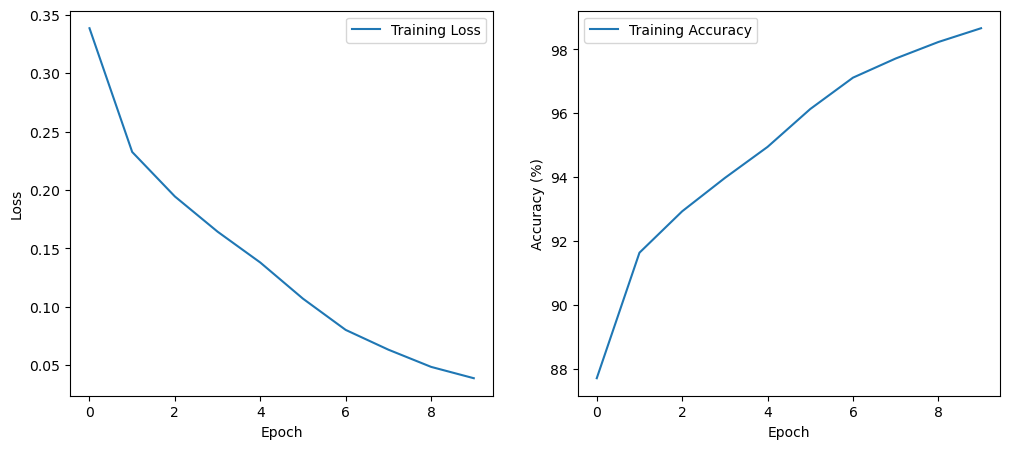

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

## Evaluating model performance


##### **Q24: How do you evaluate the fine-tuned model on the validation dataset using PyTorch?**


In [26]:
def evaluate(model, val_loader, criterion, device):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    accuracy = 100 * correct / total
    return avg_val_loss, accuracy

In [27]:
val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%')

Validation Loss: 0.2451, Accuracy: 93.72%


##### **Q25: How do you calculate and print the accuracy of the fine-tuned model on the test set?**


In [29]:
test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 0.2683, Test Accuracy: 93.17%


##### **Q26: How do you visualize the confusion matrix for the model’s predictions on the test set?**


In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

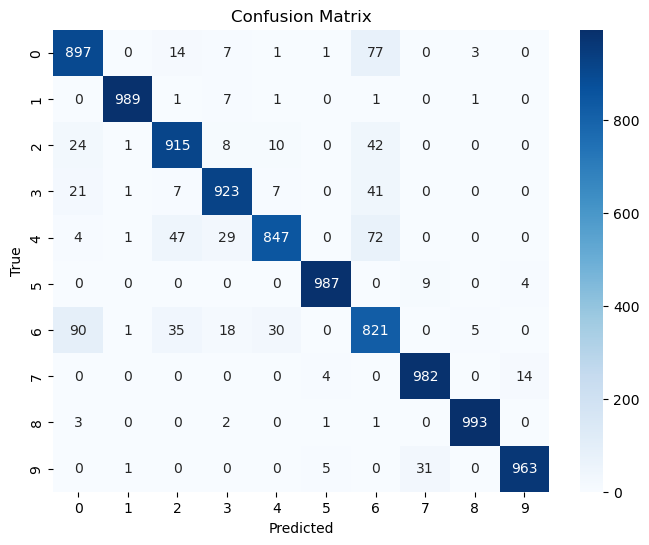

In [31]:
plot_confusion_matrix(model, test_loader, device)

##### **Q27: How do you visualize the model’s predictions versus the ground truth labels on a batch of test images?**

In [32]:
def visualize_predictions(model, test_loader, device, num_images=6):
    model.eval()
    inputs, labels = next(iter(test_loader))  # Get a batch of test data
    inputs, labels = inputs.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
    
    inputs = inputs.cpu()
    preds = preds.cpu()
    labels = labels.cpu()  # Move to CPU and visualize

    fig = plt.figure(figsize=(12, 6))
    for idx in range(num_images):
        ax = fig.add_subplot(2, num_images//2, idx+1, xticks=[], yticks=[])
        img = inputs[idx].permute(1, 2, 0).numpy() * 255  # Unnormalize
        plt.imshow(img.astype('uint8'))
        ax.set_title(f"Pred: {preds[idx]}, True: {labels[idx]}")
    plt.show()

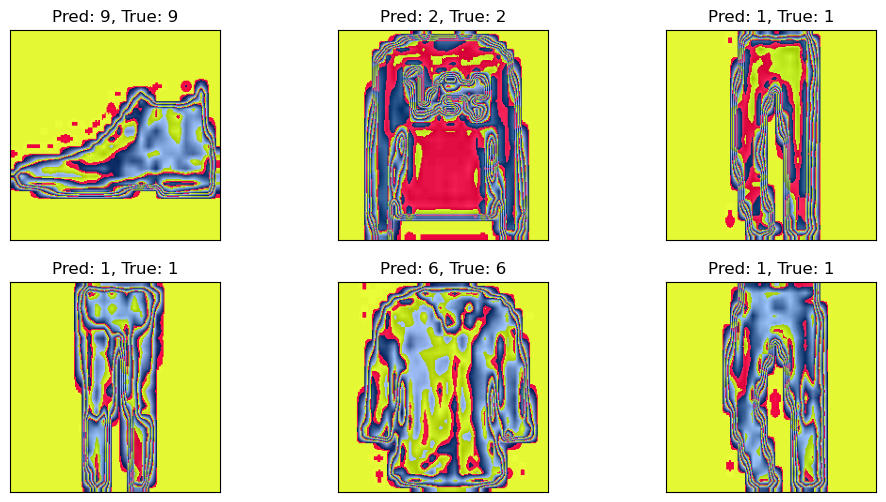

In [33]:
visualize_predictions(model, test_loader, device)

## Experimenting with hyperparameters


##### **Q28: How do you adjust the learning rate for the unfrozen layers during fine-tuning?**


In [34]:
learning_rates = [1e-2, 1e-3, 1e-4]  # List of learning rates to test
results_lr = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    optimizer = optim.Adam([
        {'params': model.fc.parameters(), 'lr': lr},  # Fine-tune the final layer with lr
        {'params': model.layer4.parameters(), 'lr': lr / 10}  # Fine-tune last block with a lower learning rate
    ])

    train_losses = []
    train_accuracies = []
    num_epochs = 2  # Number of epochs per learning rate

    for epoch in range(1, num_epochs + 1):
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        print(f'Epoch {epoch}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

    results_lr.append((lr, train_losses, train_accuracies))


Training with learning rate: 0.01
Epoch 1/2, Loss: 0.0515, Accuracy: 98.71%
Epoch 2/2, Loss: 0.0341, Accuracy: 99.07%

Training with learning rate: 0.001
Epoch 1/2, Loss: 0.0077, Accuracy: 99.79%
Epoch 2/2, Loss: 0.0019, Accuracy: 99.95%

Training with learning rate: 0.0001
Epoch 1/2, Loss: 0.0015, Accuracy: 99.96%
Epoch 2/2, Loss: 0.0011, Accuracy: 99.97%


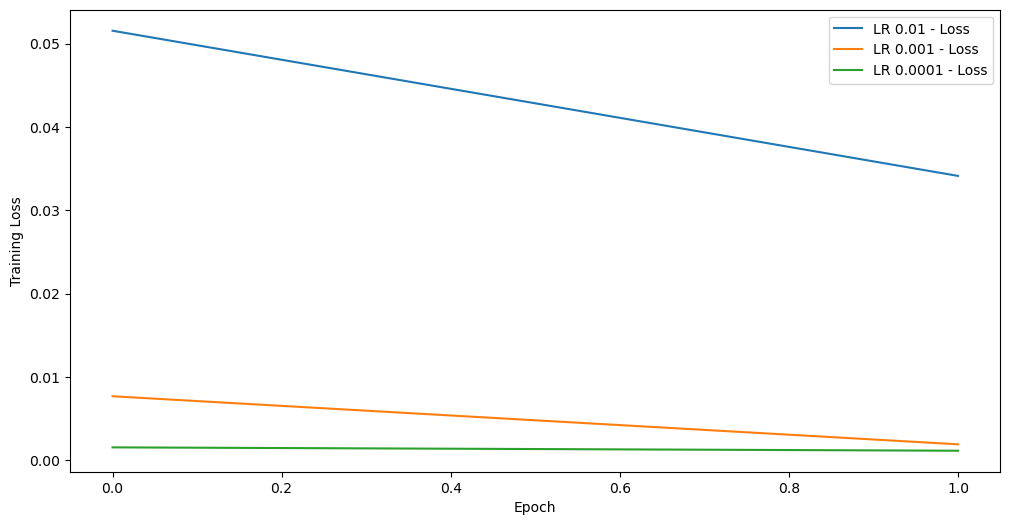

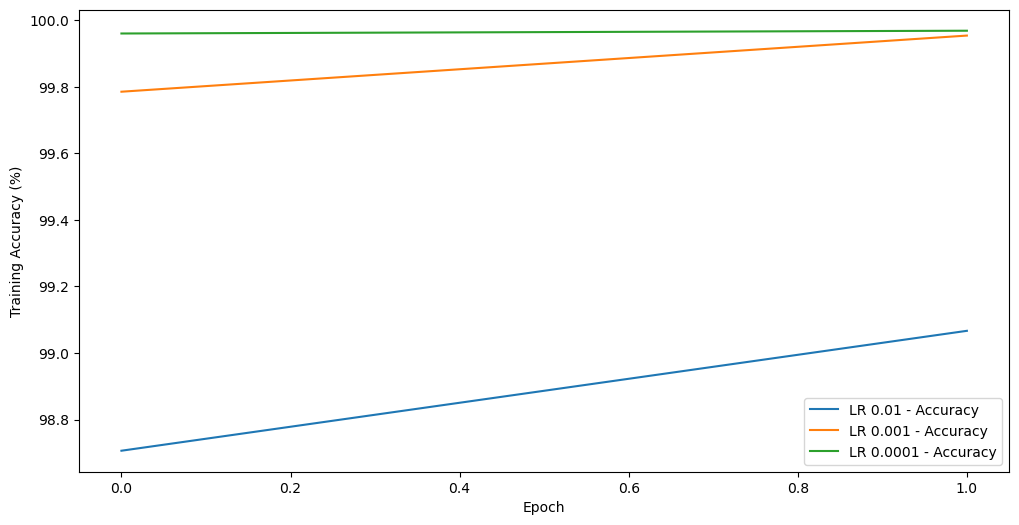

In [35]:
plt.figure(figsize=(12, 6))
for lr, train_losses, train_accuracies in results_lr:
    plt.plot(train_losses, label=f'LR {lr} - Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for lr, train_losses, train_accuracies in results_lr:
    plt.plot(train_accuracies, label=f'LR {lr} - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.legend()
plt.show()

##### **Q29: How do you experiment with different batch sizes and observe the effect on training speed and performance?**


In [36]:
batch_sizes = [2, 4, 8]  # List of batch sizes to test
results_bs = []

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)  # Adjust DataLoader for the batch size

    train_losses = []
    train_accuracies = []
    num_epochs = 3  # Number of epochs per batch size

    for epoch in range(1, num_epochs + 1):
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        print(f'Epoch {epoch}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

    results_bs.append((batch_size, train_losses, train_accuracies))


Training with batch size: 2
Epoch 1/3, Loss: 1.4549, Accuracy: 90.86%
Epoch 2/3, Loss: 0.7926, Accuracy: 92.30%
Epoch 3/3, Loss: 0.4724, Accuracy: 92.92%

Training with batch size: 4
Epoch 1/3, Loss: 0.0728, Accuracy: 98.28%
Epoch 2/3, Loss: 0.0582, Accuracy: 98.58%
Epoch 3/3, Loss: 0.0516, Accuracy: 98.70%

Training with batch size: 8
Epoch 1/3, Loss: 0.0083, Accuracy: 99.81%
Epoch 2/3, Loss: 0.0075, Accuracy: 99.81%
Epoch 3/3, Loss: 0.0058, Accuracy: 99.85%


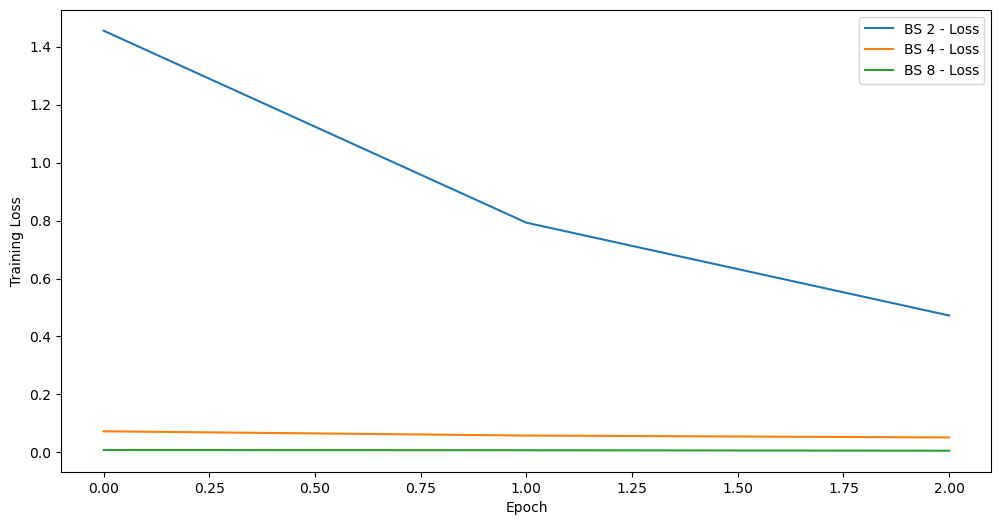

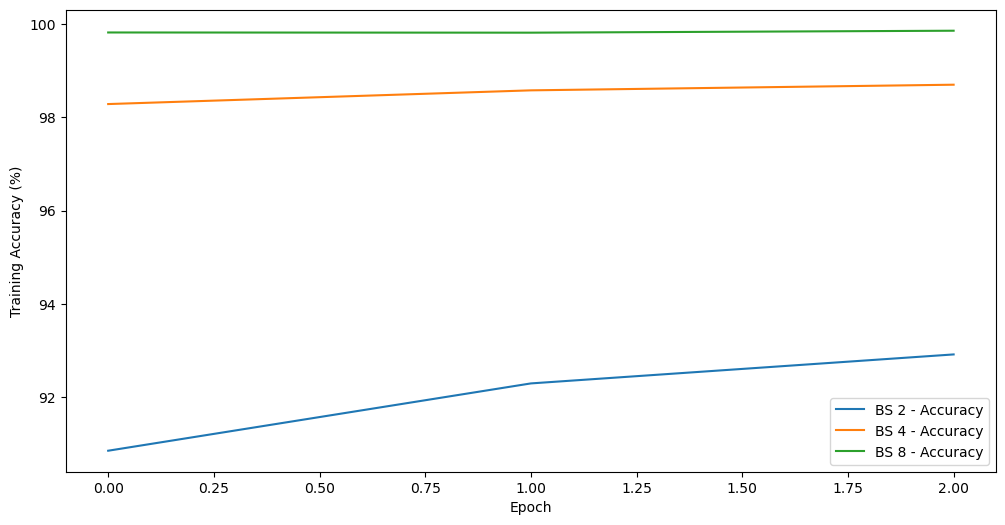

In [37]:
plt.figure(figsize=(12, 6))
for batch_size, train_losses, train_accuracies in results_bs:
    plt.plot(train_losses, label=f'BS {batch_size} - Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for batch_size, train_losses, train_accuracies in results_bs:
    plt.plot(train_accuracies, label=f'BS {batch_size} - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.legend()
plt.show()

##### **Q30: How do you modify the number of training epochs and evaluate its effect on the fine-tuned model’s performance?**


In [38]:
epoch_configs = [5, 10, 15]  # Different epoch lengths to try
results_epochs = []

for epochs in epoch_configs:
    print(f"\nTraining for {epochs} epochs")
    
    train_losses = []
    train_accuracies = []

    for epoch in range(1, epochs + 1):
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        print(f'Epoch {epoch}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

    results_epochs.append((epochs, train_losses, train_accuracies))


Training for 5 epochs
Epoch 1/5, Loss: 0.0061, Accuracy: 99.81%
Epoch 2/5, Loss: 0.0051, Accuracy: 99.87%
Epoch 3/5, Loss: 0.0043, Accuracy: 99.88%
Epoch 4/5, Loss: 0.0046, Accuracy: 99.90%
Epoch 5/5, Loss: 0.0040, Accuracy: 99.91%

Training for 10 epochs
Epoch 1/10, Loss: 0.0036, Accuracy: 99.91%
Epoch 2/10, Loss: 0.0027, Accuracy: 99.93%
Epoch 3/10, Loss: 0.0040, Accuracy: 99.90%
Epoch 4/10, Loss: 0.0028, Accuracy: 99.93%
Epoch 5/10, Loss: 0.0026, Accuracy: 99.93%
Epoch 6/10, Loss: 0.0025, Accuracy: 99.93%
Epoch 7/10, Loss: 0.0039, Accuracy: 99.92%
Epoch 8/10, Loss: 0.0021, Accuracy: 99.94%
Epoch 9/10, Loss: 0.0020, Accuracy: 99.94%
Epoch 10/10, Loss: 0.0020, Accuracy: 99.94%

Training for 15 epochs
Epoch 1/15, Loss: 0.0024, Accuracy: 99.94%
Epoch 2/15, Loss: 0.0021, Accuracy: 99.94%
Epoch 3/15, Loss: 0.0015, Accuracy: 99.95%
Epoch 4/15, Loss: 0.0015, Accuracy: 99.96%
Epoch 5/15, Loss: 0.0013, Accuracy: 99.97%
Epoch 6/15, Loss: 0.0009, Accuracy: 99.98%
Epoch 7/15, Loss: 0.0021, Accu

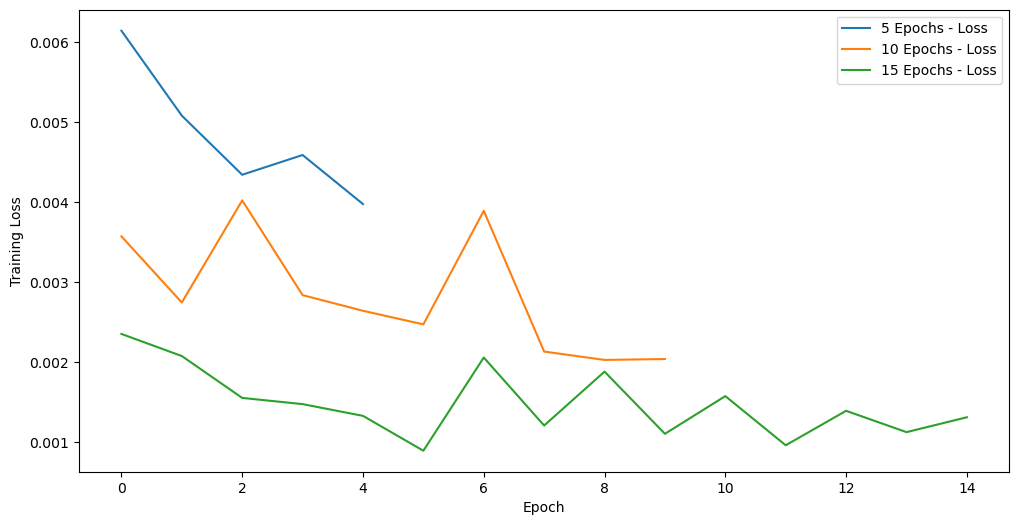

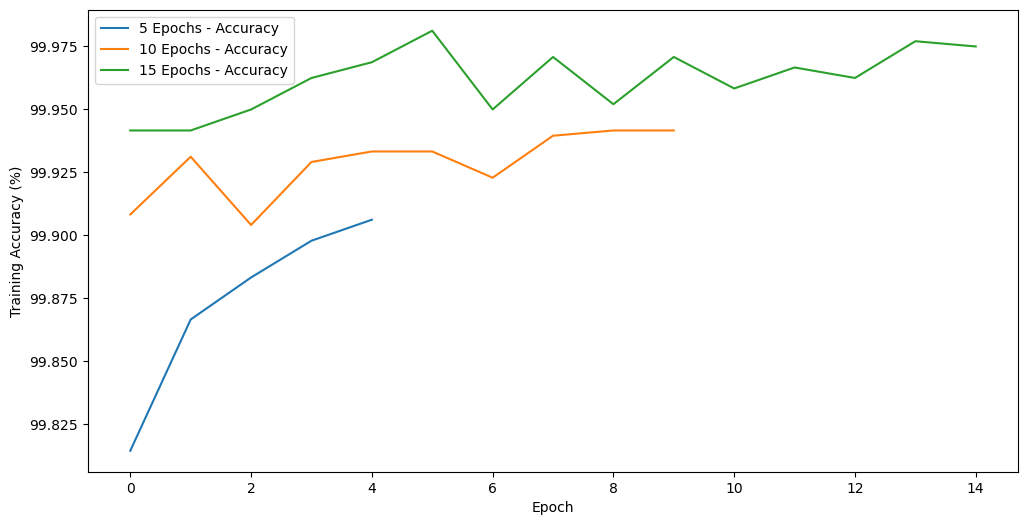

In [39]:
plt.figure(figsize=(12, 6))
for epochs, train_losses, train_accuracies in results_epochs:
    plt.plot(train_losses, label=f'{epochs} Epochs - Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for epochs, train_losses, train_accuracies in results_epochs:
    plt.plot(train_accuracies, label=f'{epochs} Epochs - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.legend()
plt.show()

##### **Q31: How do you experiment with different optimizers (e.g., Adam vs. SGD) and their parameters to optimize the fine-tuning process?**

In [40]:
optimizers = [
    ('Adam', optim.Adam(model.parameters(), lr=0.001)),
    ('SGD', optim.SGD(model.parameters(), lr=0.001, momentum=0.9)),
    ('RMSprop', optim.RMSprop(model.parameters(), lr=0.001))
]

results_optimizers = []

for name, optimizer in optimizers:
    print(f"\nTraining with {name} optimizer")

    train_losses = []
    train_accuracies = []
    num_epochs = 2  # Fixed number of epochs for optimizer testing

    for epoch in range(1, num_epochs + 1):
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        print(f'Epoch {epoch}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

    results_optimizers.append((name, train_losses, train_accuracies))


Training with Adam optimizer
Epoch 1/2, Loss: 0.1265, Accuracy: 96.37%
Epoch 2/2, Loss: 0.1060, Accuracy: 96.56%

Training with SGD optimizer
Epoch 1/2, Loss: 0.0435, Accuracy: 98.51%
Epoch 2/2, Loss: 0.0290, Accuracy: 99.00%

Training with RMSprop optimizer
Epoch 1/2, Loss: 0.0802, Accuracy: 97.25%
Epoch 2/2, Loss: 0.0650, Accuracy: 97.84%


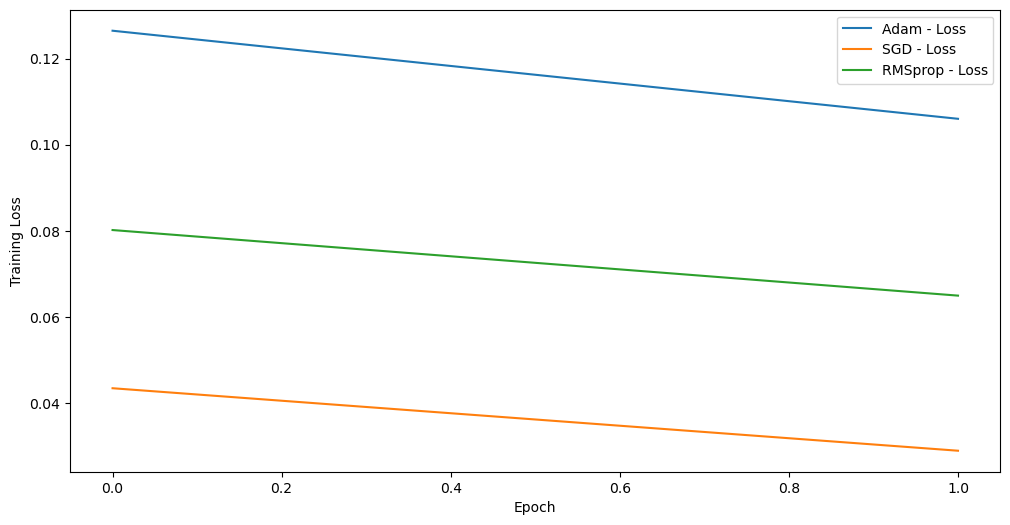

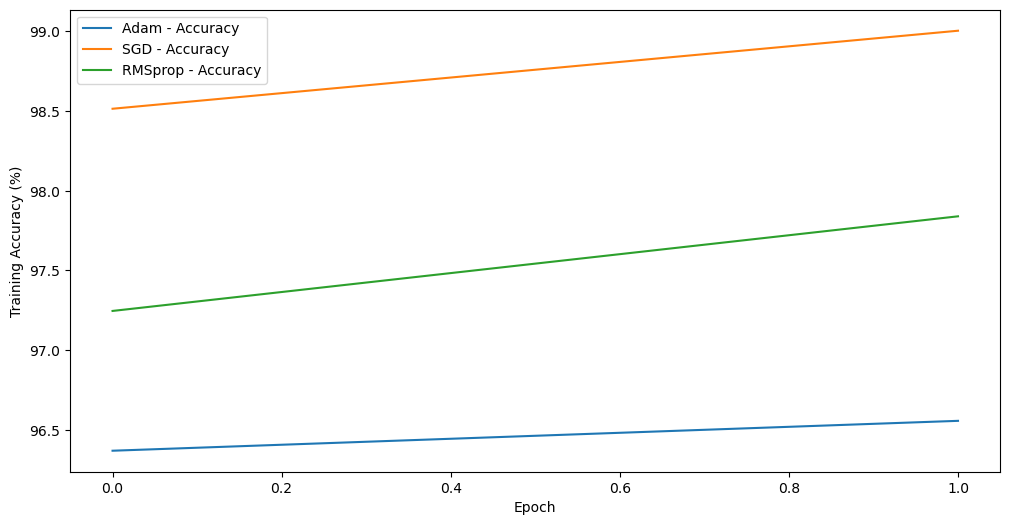

In [41]:
plt.figure(figsize=(12, 6))
for name, train_losses, train_accuracies in results_optimizers:
    plt.plot(train_losses, label=f'{name} - Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for name, train_losses, train_accuracies in results_optimizers:
    plt.plot(train_accuracies, label=f'{name} - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.legend()
plt.show()

In [42]:
import shutil
import os

if os.path.exists('data'):
    shutil.rmtree('data')
    print("Folder 'data' has been deleted.")
else:
    print("Folder 'data' does not exist.")

Folder 'data' has been deleted.
